# Walmart Sales Analysis and Forecasting

## Problem Statement
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

We need to:
1. Perform statistical analysis, EDA, outlier analysis, and handle missing values
2. Answer specific questions about how various factors affect sales
3. Build predictive models to forecast sales for the next 12 weeks

In [2]:
pip install pandas matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


 ### 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### 2. Load Data

In [5]:
# Update the path if your file is elsewhere
df = pd.read_csv("walmart.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

### 3. Basic Info and Null Check

In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### 4. EDA & Statistical Analysis

### a. Correlation with Unemployment

              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.106176
Unemployment     -0.106176      1.000000


<Axes: title={'center': 'Unemployment Effect by Store'}, xlabel='Store'>

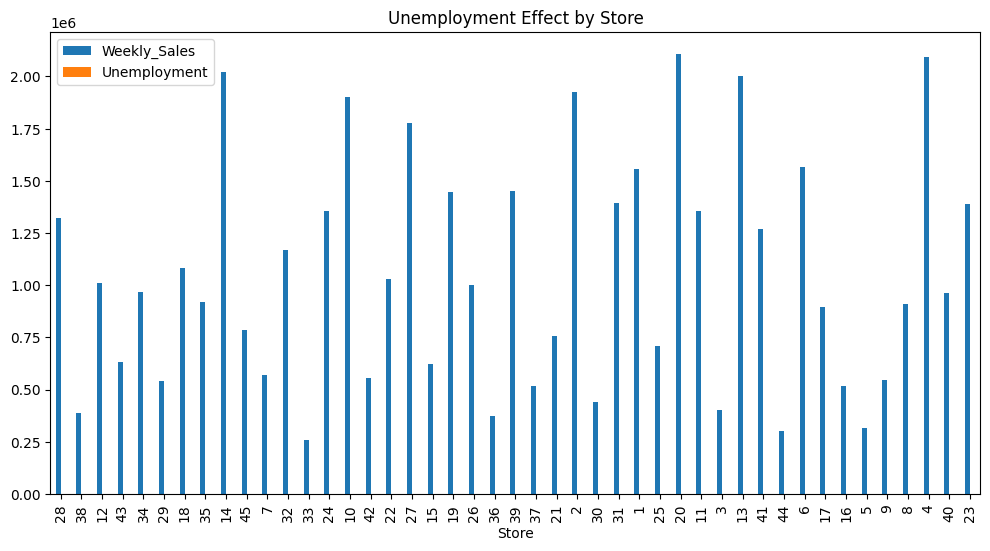

In [10]:
corr = df[['Weekly_Sales', 'Unemployment']].corr()
print(corr)

unemp_effect = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean().sort_values('Unemployment', ascending=False)
unemp_effect.plot(kind='bar', figsize=(12,6), title="Unemployment Effect by Store")


### b. Does Temperature Affect Sales?

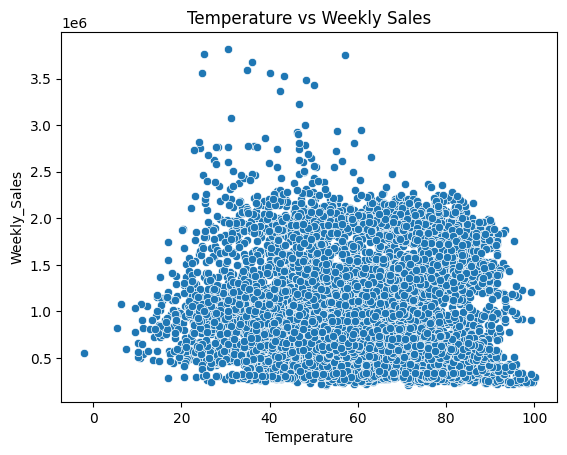

In [19]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Temperature vs Weekly Sales")
plt.show()

### c. Consumer Price Index (CPI) vs Sales

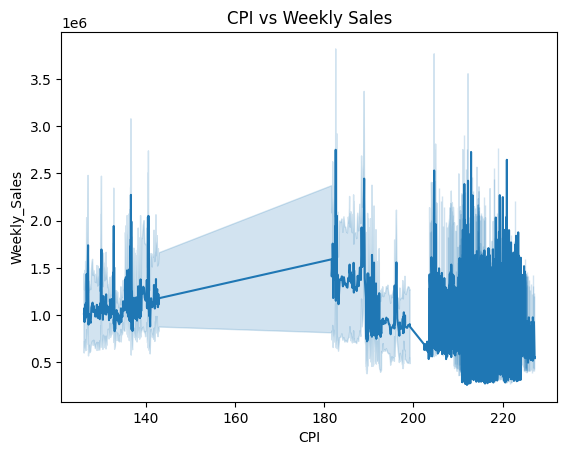

In [22]:
sns.lineplot(data=df, x='CPI', y='Weekly_Sales')
plt.title("CPI vs Weekly Sales")
plt.show()

### d. Seasonal Trends (Decomposition)

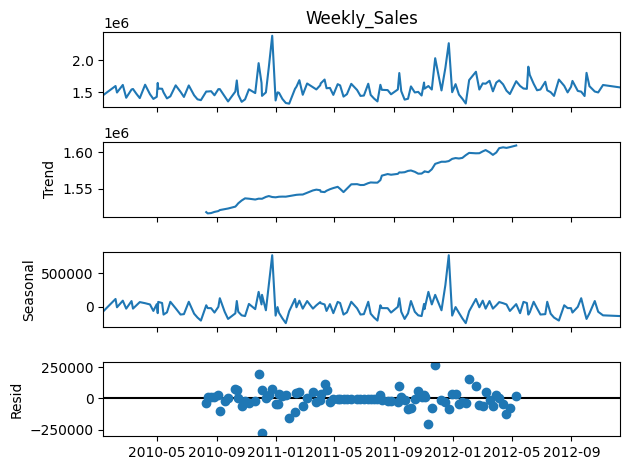

In [25]:
store1 = df[df['Store'] == 1].set_index('Date').sort_index()
decomp = seasonal_decompose(store1['Weekly_Sales'], model='additive', period=52)
decomp.plot()
plt.show()

### e. Top & Worst Performing Stores

Top Performing Store: 20, Sales: 301397792.46
Worst Performing Store: 33, Sales: 37160221.96


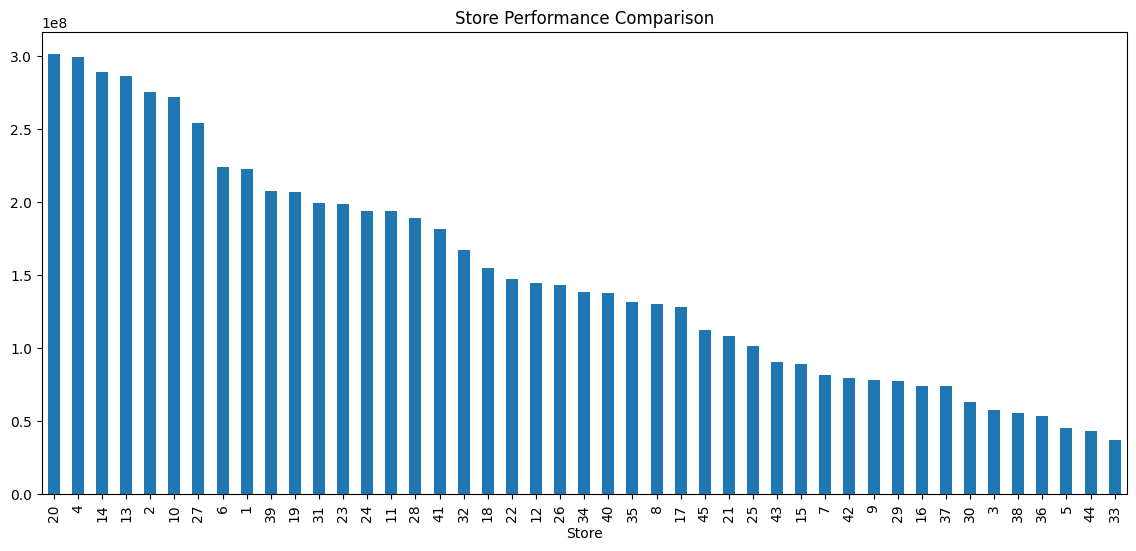

In [28]:
performance = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_store = performance.idxmax()
worst_store = performance.idxmin()

print(f"Top Performing Store: {top_store}, Sales: {performance.max()}")
print(f"Worst Performing Store: {worst_store}, Sales: {performance.min()}")

performance.plot(kind='bar', figsize=(14,6), title='Store Performance Comparison')
plt.show()


### 5. Predictive Modeling (Next 12 Weeks)

In [31]:
# Create features
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Drop date for now
df_model = df.drop(columns=['Date'])

X = df_model.drop(['Weekly_Sales'], axis=1)
y = df_model['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 130190.33692954031


### 6. Forecast Next 12 Weeks (Example for Store 1)

In [34]:
future_weeks = pd.DataFrame({
    'Store': [1]*12,
    'Holiday_Flag': [0]*12,
    'Temperature': [60]*12,  # replace with avg or predicted values
    'Fuel_Price': [3.5]*12,
    'CPI': [200]*12,
    'Unemployment': [7]*12,
    'Week': list(range(1, 13)),
    'Year': [2025]*12
})

predicted_sales = model.predict(future_weeks)
future_weeks['Predicted_Sales'] = predicted_sales
print(future_weeks[['Week', 'Predicted_Sales']])


    Week  Predicted_Sales
0      1     1.497512e+06
1      2     1.496889e+06
2      3     1.496889e+06
3      4     1.496172e+06
4      5     1.518456e+06
5      6     1.526221e+06
6      7     1.526453e+06
7      8     1.518801e+06
8      9     1.518825e+06
9     10     1.524310e+06
10    11     1.525454e+06
11    12     1.525389e+06
